# Predicting House Pricing with different machine learning models

First of all we import the needed libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn


We read the data with pandas

In [2]:
data = pd.read_csv('airbnb-listings-extract.csv', sep=';')


First approach to database should be know how big it is (shape, dimensions (column names/number))

In [3]:
data.shape

(14780, 89)

In [4]:
data['City'].nunique()

246

In [5]:
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

We have a database with many columns (89) but we also have many entries/documents/registers, so we shouldn't have problems with dimensionality. Anyways, we need to analize columnms to see if we have redundant information (all that'll come after splitting data)

In [6]:
(data[data['Price']>600]).shape[0]

39

In [7]:
data.head() #First sight of database

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [8]:
data['ID'].nunique() #Just checking if there is some ID duplicates, not the case, all have uniques ID's

14780

Time to split

In [9]:
from sklearn.model_selection import train_test_split

                                                                                              
#For better practice, and prevent data leakage, I'll separate the train and test data into separate csv files

train, test = train_test_split(data, test_size=0.25, shuffle=True, random_state=0) #randomstate to make the model replicable

train.to_csv('./data/airbnb_train.csv', sep=';')
test.to_csv('./data/airbnb_test.csv', sep=';')

#Check shapes

print(f" train shape: {train.shape} \n test shape: {test.shape}")


 train shape: (11085, 89) 
 test shape: (3695, 89)


In [10]:
data_house = pd.read_csv('./data/airbnb_train.csv', sep=';') #df to work on

We've identified our target variable ('Price'), and divided our data, so now is time to start evaluating the features we have

# Exploratory Data Analysis

First overview on the data will be focused on na values.

In [11]:
print(data_house.isna().sum().to_string()) #to string so we can seethe full output for na values on each column

Unnamed: 0                            0
ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             447
Space                              2906
Description                           6
Experiences Offered                   0
Neighborhood Overview              4222
Notes                              6831
Transit                            4290
Access                             4833
Interaction                        4902
House Rules                        3883
Thumbnail Url                      2158
Medium Url                         2158
Picture Url                          18
XL Picture Url                     2158
Host ID                               0
Host URL                              0
Host Name                             2
Host Since                            2
Host Location                        29


In [12]:
summaryNa = pd.DataFrame({
    'N° NA' : data_house.isna().sum(),
    '%' : round(data_house.isna().sum() / len(data_house) * 100,1) 
})
sorted = summaryNa.sort_values(by='%', ascending=False)
sorted #as im not able to see the full df, i'll convert it to string

,N° NA,%
Has Availability,11078,99.9
Host Acceptance Rate,11057,99.7
Jurisdiction Names,10927,98.6
License,10817,97.6
Square Feet,10639,96.0
...,...,...
Longitude,0,0.0
Property Type,0,0.0
Room Type,0,0.0
Accommodates,0,0.0


In [13]:
print(sorted.to_string())

                                N° NA     %
Has Availability                11078  99.9
Host Acceptance Rate            11057  99.7
Jurisdiction Names              10927  98.6
License                         10817  97.6
Square Feet                     10639  96.0
Monthly Price                    8396  75.7
Weekly Price                     8392  75.7
Notes                            6831  61.6
Security Deposit                 6327  57.1
Interaction                      4902  44.2
Access                           4833  43.6
Cleaning Fee                     4528  40.8
Transit                          4290  38.7
Neighborhood Overview            4222  38.1
Host About                       3912  35.3
Neighbourhood                    3903  35.2
House Rules                      3883  35.0
Space                            2906  26.2
Host Neighbourhood               2880  26.0
Review Scores Checkin            2525  22.8
Review Scores Value              2529  22.8
Review Scores Location          

In [14]:
sorted[sorted['%'] > 50] #get the columns where the na values are higher than 50%

,N° NA,%
Has Availability,11078,99.9
Host Acceptance Rate,11057,99.7
Jurisdiction Names,10927,98.6
License,10817,97.6
Square Feet,10639,96.0
Monthly Price,8396,75.7
Weekly Price,8392,75.7
Notes,6831,61.6
Security Deposit,6327,57.1


In [15]:
columns_to_drop1 = sorted[sorted['%'] > 50].iloc[:8].index.tolist() #here, from the same sorted list, i took the first 8 values into a list.
columns_to_drop1

['Has Availability',
 'Host Acceptance Rate',
 'Jurisdiction Names',
 'License',
 'Square Feet',
 'Monthly Price',
 'Weekly Price',
 'Notes']

In [16]:
print(data_house.dtypes.to_string())

Unnamed: 0                          int64
ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
Summary                            object
Space                              object
Description                        object
Experiences Offered                object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Thumbnail Url                      object
Medium Url                         object
Picture Url                        object
XL Picture Url                     object
Host ID                             int64
Host URL                           object
Host Name                          object
Host Since                        

As we have many columns/dimensions on the df, we should get rid of the redundant/useless information, for that, we need to evaluate which of them have more NA (which is already done above), and which column has info that is not related with the main goal of this model (i.e. urls to images), which is what we are going to do now.

Also, in order to know if we can convert a column from categorical values to some label for the ML model, we need to know if it has a label or just a paragraph describing something. We can have a sight on it checking on the unique values (if the unique values are close to the number of rows, then is not a label, just a paragraph commenting in natural language some feature, if opposite, then we have a categorical variable)

In [17]:
x = data_house.nunique().sort_values(ascending=True)
print(x.to_string())

Has Availability                      1
Room Type                             3
Host Response Time                    4
Experiences Offered                   5
Bed Type                              5
Cancellation Policy                   8
Review Scores Location                8
Review Scores Communication           8
Review Scores Value                   9
Review Scores Accuracy                9
Review Scores Checkin                 9
Review Scores Cleanliness             9
Host Acceptance Rate                 10
Bedrooms                             10
Jurisdiction Names                   11
Guests Included                      15
Beds                                 16
Accommodates                         16
Bathrooms                            17
Country                              17
Country Code                         18
Property Type                        21
Availability 30                      31
Last Scraped                         36
Scrape ID                            37


In [18]:
"""
dropping columns 
first, a list of columns to drop
Remember we already have a columns_to_drop1 on the sorted NA count per column
Anyways, we dont care about selecting the same column twice, as we are going to merge both lists into a set

"""
#Selection here goes to the columns with text, not categorical data but natural language 
columns_to_drop2 = ['ID', 'Geolocation','Listing Url','Picture Url','Name','Description','Summary','Amenities','Thumbnail Url','XL Picture Url',
                    'Medium Url','Host URL','Host Picture Url','Host Thumbnail Url','House Rules','Neighborhood Overview','Transit','Access',
                    'Host About', 'Scrape ID', 'Last Scraped', 'Calendar last Scraped','First Review','Last Review', 'Unnamed: 0', 'Host ID',
                    'Host Name', 'Space', 'Interaction','Host Listings Count','Calendar Updated','Host Since']

#now, we join both list into one
col_to_drop = list(set(columns_to_drop1+columns_to_drop2)) #set takes care of the duplicates

#we'll use "preview" df to check everything before appliyng it to train, so here and forward we'll work with "preview"

preview = data_house.drop(col_to_drop, axis=1)
preview.columns

Index(['Experiences Offered', 'Host Location', 'Host Response Time',
       'Host Response Rate', 'Host Neighbourhood', 'Host Total Listings Count',
       'Host Verifications', 'Street', 'Neighbourhood',
       'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City',
       'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count',

In [19]:
preview.head()

,Experiences Offered,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,...,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month,Features
0,none,"Palma de Mallorca, Balearic Islands, Spain",within an hour,97.0,Palacio,68.0,"email,phone,facebook,reviews,jumio","Sóller, Balearic Islands 07100, Spain",NaN,Sóller,...,10.0,10.0,10.0,10.0,10.0,9.0,super_strict_60,63.0,1.69,"Host Has Profile Pic,Host Identity Verified,Re..."
1,none,"Madrid, Community of Madrid, Spain",within a day,90.0,NaN,3.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28005, Spain",NaN,Acacias,...,8.0,8.0,10.0,10.0,6.0,8.0,flexible,3.0,0.12,"Host Has Profile Pic,Requires License"
2,none,"Madrid, Community of Madrid, Spain",within a few hours,75.0,Rios Rosas,164.0,"email,phone,reviews","La Latina, Madrid, Comunidad de Madrid 28005, ...",La Latina,Embajadores,...,10.0,10.0,10.0,8.0,10.0,10.0,strict,145.0,0.10,"Host Has Profile Pic,Is Location Exact,Require..."
3,none,"Vienna, Wien, Austria",within an hour,98.0,Margareten,21.0,"email,phone,jumio","Landstraße, Wien, Wien 1030, Austria",Landstraße,Landstra§e,...,9.0,9.0,9.0,9.0,9.0,9.0,flexible,21.0,5.46,"Host Has Profile Pic,Is Location Exact,Instant..."
4,none,"Barcelona, Catalonia, Spain",within an hour,100.0,Dreta de l'Eixample,22.0,"email,phone,google,reviews,jumio,work_email","Sol, Madrid, Comunidad de Madrid 28013, Spain",Sol,Sol,...,10.0,6.0,10.0,10.0,10.0,8.0,strict,13.0,0.11,"Host Has Profile Pic,Host Identity Verified,Is..."


In [20]:
"""
Now, we need to check categorical data, we'll sort them in y, and then select the ones we want to check the unique values to see if we need
to change to one hot/ label encoding (first one is more suitable for non-ordinal categories)
"""
y = preview.nunique().sort_values(ascending=True)
print(y.to_string())

Room Type                             3
Host Response Time                    4
Experiences Offered                   5
Bed Type                              5
Cancellation Policy                   8
Review Scores Location                8
Review Scores Communication           8
Review Scores Value                   9
Review Scores Checkin                 9
Review Scores Cleanliness             9
Review Scores Accuracy                9
Bedrooms                             10
Guests Included                      15
Beds                                 16
Accommodates                         16
Bathrooms                            17
Country                              17
Country Code                         18
Property Type                        21
Availability 30                      31
Minimum Nights                       41
Market                               41
Neighbourhood Group Cleansed         45
Calculated host listings count       45
Review Scores Rating                 51


In [21]:
columns_to_evaluate = y.iloc[0:17].index.tolist()
columns_to_evaluate
for col in columns_to_evaluate:
    print(f"{col}: {preview[col].unique()}")

Room Type: ['Entire home/apt' 'Private room' 'Shared room']
Host Response Time: ['within an hour' 'within a day' 'within a few hours' 'a few days or more'
 nan]
Experiences Offered: ['none' 'social' 'business' 'romantic' 'family']
Bed Type: ['Real Bed' 'Pull-out Sofa' 'Couch' 'Futon' 'Airbed']
Cancellation Policy: ['super_strict_60' 'flexible' 'strict' 'moderate' 'flexible_new'
 'super_strict_30' 'strict_new' 'moderate_new']
Review Scores Location: [10.  6.  9. nan  8.  7.  5.  4.  2.]
Review Scores Communication: [10.  8.  9. nan  6.  7.  2.  4.  5.]
Review Scores Value: [ 9.  8. 10. nan  7.  6.  4.  2.  5.  3.]
Review Scores Checkin: [10.  9. nan  8.  7.  6.  2.  5.  4.  3.]
Review Scores Cleanliness: [10.  8.  9.  6. nan  7.  2.  5.  3.  4.]
Review Scores Accuracy: [10.  8.  9. nan  6.  4.  7.  5.  2.  3.]
Bedrooms: [ 2.  1.  3.  0.  5.  4.  6. 10. nan  7.  8.]
Guests Included: [ 2  1  4  3  6  8  7 10  5 14  9 12  0 16 15]
Beds: [ 2.  1.  5. 11.  3.  7.  4.  6.  8. nan 12.  9. 10. 

From that output, we can see the following:

Variables that need to be encoded:
- One hot (non-ordinal):
    - Room Type
    - Bed Type
    - Experiences Offered
    - Cancellation Policy
    - Country

- Label Encoding (ordinal):
    - Host Response Time

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
preview['Host Response Time'] = le.fit_transform(preview['Host Response Time'])
preview['Host Response Time']

0        3
1        1
2        2
3        3
4        3
        ..
11080    3
11081    3
11082    3
11083    3
11084    2
Name: Host Response Time, Length: 11085, dtype: int32

In [23]:
preview = pd.get_dummies(preview, columns=['Room Type', 'Bed Type', 'Experiences Offered', 'Cancellation Policy','Country'], drop_first=True)
preview.shape

(11085, 78)

In [24]:
preview.columns

Index(['Host Location', 'Host Response Time', 'Host Response Rate',
       'Host Neighbourhood', 'Host Total Listings Count', 'Host Verifications',
       'Street', 'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Latitude', 'Longitude',
       'Property Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Calculated host listings count',
       'Reviews per Month', 'Features', 'Room Type_Private room',
       'Room Type_Shared room

In [25]:
preview.describe()

,Host Response Time,Host Response Rate,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,11085.000000,9661.000000,11083.000000,11085.000000,11085.000000,11085.000000,11043.000000,11065.000000,11050.000000,11071.000000,...,11085.000000,8586.000000,8566.000000,8571.000000,8560.000000,8570.000000,8558.000000,8556.000000,11081.000000,8701.000000
mean,2.630221,94.817617,12.848868,40.488276,-3.715292,3.288498,1.288916,1.348305,2.052489,74.194111,...,22.570230,91.639646,9.412328,9.322716,9.622079,9.646441,9.535990,9.211781,9.677466,1.870238
std,0.923903,15.194586,34.751026,4.721665,13.868197,2.099247,0.668322,0.907391,1.630873,72.357472,...,38.008034,9.063634,0.930238,0.997276,0.805144,0.764536,0.773254,0.957315,23.887079,1.873315
min,0.000000,0.000000,0.000000,-37.851182,-122.437371,1.000000,0.000000,0.000000,1.000000,9.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,2.000000,100.000000,1.000000,40.409774,-3.707543,2.000000,1.000000,1.000000,1.000000,34.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,3.000000,100.000000,2.000000,40.419335,-3.700769,3.000000,1.000000,1.000000,2.000000,56.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,3.000000,100.000000,6.000000,40.430750,-3.683986,4.000000,1.000000,2.000000,2.000000,88.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.770000
max,4.000000,100.000000,519.000000,55.956716,153.371427,16.000000,8.000000,10.000000,16.000000,969.000000,...,344.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


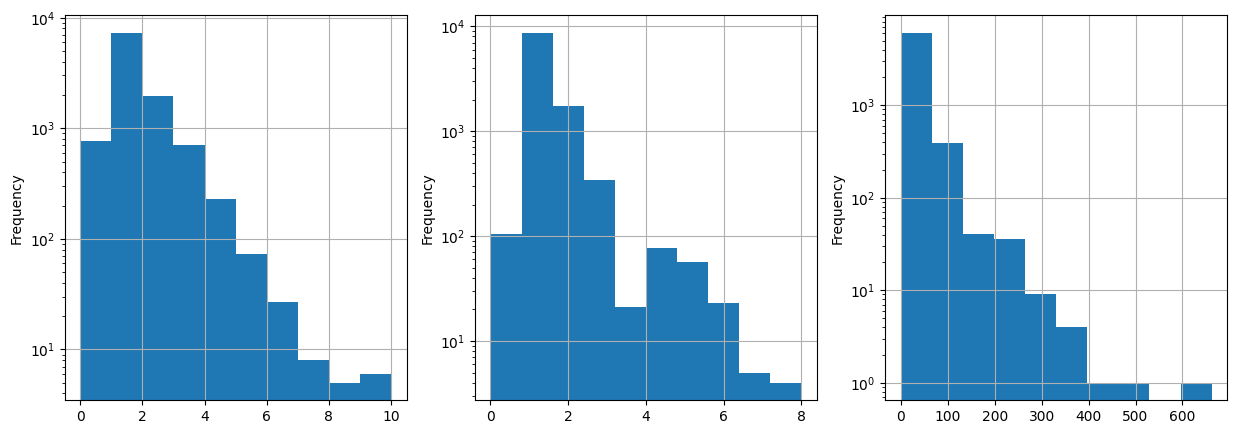

In [26]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
preview['Bedrooms'].plot.hist(grid = True)
plt.yscale("log")
#plt.xlabel('bedrooms')

plt.subplot(1,3,2)
preview['Bathrooms'].plot.hist(grid = True)
plt.yscale("log")
#plt.xlabel('algo')

plt.subplot(1,3,3)
preview['Cleaning Fee'].plot.hist(grid = True)
plt.yscale("log")

#Log scale is used so we can see better possile

In [27]:
#We'll check for that high cleaning fee value, to see if it is an outlier
print(preview[preview['Cleaning Fee']> 500].T.to_string())

                                                                                                                                8778
Host Location                                                                                     Madrid, Community of Madrid, Spain
Host Response Time                                                                                                                 3
Host Response Rate                                                                                                             100.0
Host Neighbourhood                                                                                                               NaN
Host Total Listings Count                                                                                                        1.0
Host Verifications                   email,phone,reviews,jumio,offline_government_id,selfie,government_id,identity_manual,work_email
Street                                                               

We have an outlier that we can take out

Now, we can check the variables correlation with our target variable (price)

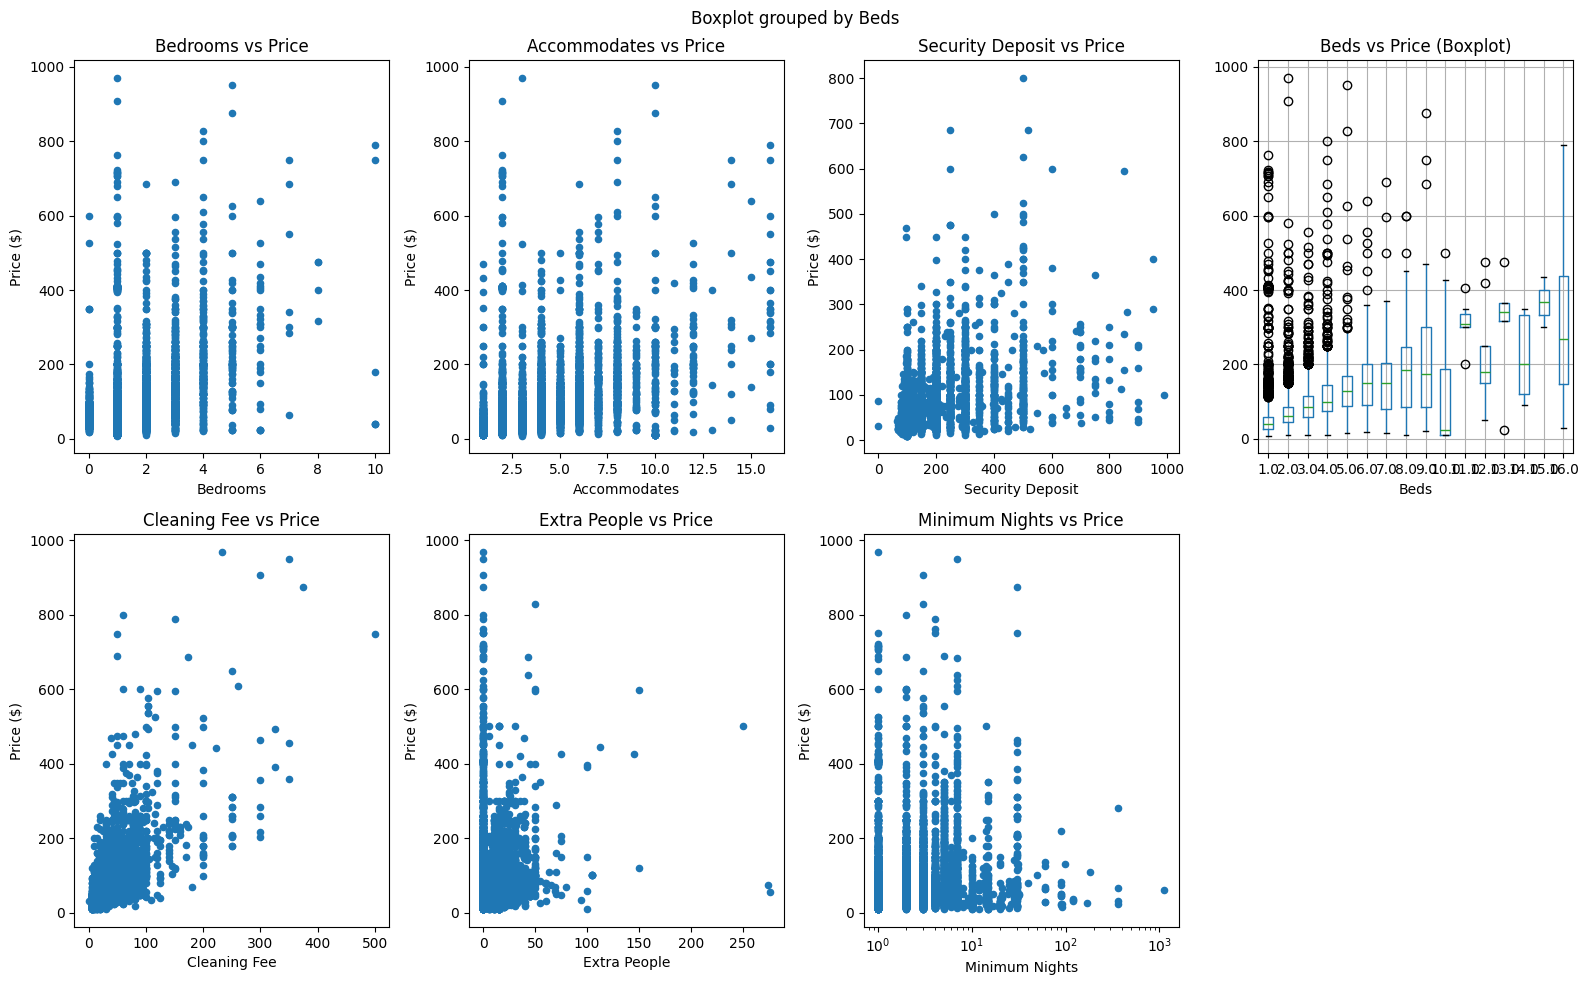

In [28]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

preview.plot(kind='scatter', x='Bedrooms', y='Price', ax=axes[0, 0])
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Bedrooms vs Price')

preview.plot(kind='scatter', x='Accommodates', y='Price', ax=axes[0, 1])
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Accommodates vs Price')

preview.plot(kind='scatter', x='Security Deposit', y='Price', ax=axes[0, 2])
axes[0, 2].set_ylabel('Price ($)')
axes[0, 2].set_title('Security Deposit vs Price')

preview.boxplot(by='Beds', column='Price', ax=axes[0, 3])
axes[0, 3].set_title('Beds vs Price (Boxplot)')

preview.plot(kind='scatter', x='Cleaning Fee', y='Price', ax=axes[1, 0])
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].set_title('Cleaning Fee vs Price')

preview.plot(kind='scatter', x='Extra People', y='Price', ax=axes[1, 1])
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Extra People vs Price')

preview.plot(kind='scatter', x='Minimum Nights', y='Price', ax=axes[1, 2])
axes[1, 2].set_ylabel('Price ($)')
axes[1, 2].set_title('Minimum Nights vs Price')
axes[1, 2].set_xscale('log')

fig.delaxes(axes[1, 3])

plt.tight_layout()
plt.show()


Not much can be taken from this graphics, as there is no clear relationship between the variables and the target, 
we can use describe to check if there is outliers in some columns, by checking mean, 75% and max values

In [29]:
print(preview.describe().to_string())

       Host Response Time  Host Response Rate  Host Total Listings Count      Latitude     Longitude  Accommodates     Bathrooms      Bedrooms          Beds         Price  Security Deposit  Cleaning Fee  Guests Included  Extra People  Minimum Nights  Maximum Nights  Availability 30  Availability 60  Availability 90  Availability 365  Number of Reviews  Review Scores Rating  Review Scores Accuracy  Review Scores Cleanliness  Review Scores Checkin  Review Scores Communication  Review Scores Location  Review Scores Value  Calculated host listings count  Reviews per Month
count        11085.000000         9661.000000               11083.000000  11085.000000  11085.000000  11085.000000  11043.000000  11065.000000  11050.000000  11071.000000       4758.000000   6557.000000     11085.000000  11085.000000    11085.000000    11085.000000     11085.000000     11085.000000     11085.000000      11085.000000       11085.000000           8586.000000             8566.000000                8571.00000

In [30]:
#Outliers

#Host listings count >6

#preview[preview['Host Total Listings Count'] > 6]  #All good, no need to take out nothing


#security deposit > 200
#preview[preview['Security Deposit'] > 300] #all good

#Cleaning fee > 400
preview[preview['Cleaning Fee'] > 400].T #two to take out


,6430,8778
Host Location,"Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain"
Host Response Time,2,3
Host Response Rate,100.0,100.0
Host Neighbourhood,La Latina,NaN
Host Total Listings Count,68.0,1.0
...,...,...
Country_Netherlands,False,False
Country_Spain,True,False
Country_Switzerland,False,False
Country_United Kingdom,False,False


In [31]:
#Extra People > 15
preview[preview['Extra People'] > 100].T #14 out


,373,1621,2490,3472,3542,4607,4787,6259,7727,7837,8326,8778,10234,10775
Host Location,"Copenhagen, Capital Region of Denmark, Denmark",ES,ES,"Barcelona, Catalonia, Spain","Madrid, Madrid, Spain","Barranquilla, Atlantico, Colombia","Barcelona, Catalonia, Spain",FR,"Barcelona, Catalonia, Spain","Palma de Mallorca, Balearic Islands, Spain","Barcelona, Catalonia, Spain","Madrid, Community of Madrid, Spain","Barcelona, Catalonia, Spain",Hong Kong
Host Response Time,4,2,4,3,3,4,3,1,3,3,3,3,3,3
Host Response Rate,NaN,100.0,NaN,100.0,100.0,NaN,100.0,100.0,100.0,97.0,100.0,100.0,100.0,100.0
Host Neighbourhood,NaN,Trafalgar,Malasaña,NaN,Cortes,Embajadores,NaN,Malasaña,NaN,Palacio,NaN,NaN,NaN,Tsim Sha Tsui
Host Total Listings Count,1.0,1.0,1.0,162.0,12.0,2.0,162.0,1.0,162.0,68.0,162.0,1.0,162.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_Netherlands,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Country_Spain,False,True,True,True,True,True,True,True,True,True,True,False,True,False
Country_Switzerland,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Country_United Kingdom,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
#minimum nights

preview[preview['Minimum Nights'] > 100]

,Host Location,Host Response Time,Host Response Rate,Host Neighbourhood,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,...,Country_Germany,Country_Greece,Country_Hong Kong,Country_Ireland,Country_Italy,Country_Netherlands,Country_Spain,Country_Switzerland,Country_United Kingdom,Country_United States
278,"Madrid, Community of Madrid, Spain",3,98.0,Aluche,46.0,"email,phone,reviews,jumio","Aluche, Madrid, Comunidad de Madrid 28011, Spain",Aluche,Puerta del Angel,Latina,...,False,False,False,False,False,False,True,False,False,False
2381,ES,4,NaN,NaN,1.0,"email,phone","Madrid, Comunidad de Madrid 28005, Spain",NaN,Palacio,Centro,...,False,False,False,False,False,False,True,False,False,False
2583,"Madrid, Community of Madrid, Spain",4,NaN,Arganzuela,1.0,"email,phone,reviews","Arganzuela, Madrid, Comunidad de Madrid 28012,...",Arganzuela,Palos de Moguer,Arganzuela,...,False,False,False,False,False,False,True,False,False,False
4913,España,4,NaN,NaN,1.0,"email,phone,reviews","Madrid, Comunidad de Madrid 28038, Spain",NaN,Palomeras Sureste,Puente de Vallecas,...,False,False,False,False,False,False,True,False,False,False
5593,"Madrid, Community of Madrid, Spain",3,100.0,NaN,3.0,"email,phone,reviews,jumio,government_id","Madrid, Community of Madrid, Spain",NaN,Pacífico,Retiro,...,False,False,False,False,False,False,True,False,False,False
7285,"Madrid, Community of Madrid, Spain",4,NaN,Embajadores,2.0,"email,phone,reviews","Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,Embajadores,Centro,...,False,False,False,False,False,False,True,False,False,False
7741,"Madrid, Community of Madrid, Spain",4,NaN,Usera,1.0,"email,phone,reviews","Usera, Madrid, Community of Madrid 28026, Spain",Usera,Almendrales,Usera,...,False,False,False,False,False,False,True,False,False,False
7856,"Madrid, Community of Madrid, Spain",4,NaN,NaN,2.0,"email,phone","Madrid, Comunidad de Madrid 28003, Spain",NaN,Cuatro Caminos,Tetuán,...,False,False,False,False,False,False,True,False,False,False
9395,"Madrid, Madrid, Spain",2,100.0,Castellana,7.0,"email,phone,facebook,reviews","Castellana, Madrid, Madrid 28006, Spain",Castellana,Castellana,Salamanca,...,False,False,False,False,False,False,True,False,False,False
9709,"Madrid, Community of Madrid, Spain",4,NaN,Palacio,1.0,"email,phone,reviews","Palacio, Madrid, Community of Madrid 28013, Spain",Palacio,Palacio,Centro,...,False,False,False,False,False,False,True,False,False,False


In [33]:
print(preview.dtypes.to_string())

Host Location                           object
Host Response Time                       int32
Host Response Rate                     float64
Host Neighbourhood                      object
Host Total Listings Count              float64
Host Verifications                      object
Street                                  object
Neighbourhood                           object
Neighbourhood Cleansed                  object
Neighbourhood Group Cleansed            object
City                                    object
State                                   object
Zipcode                                 object
Market                                  object
Smart Location                          object
Country Code                            object
Latitude                               float64
Longitude                              float64
Property Type                           object
Accommodates                             int64
Bathrooms                              float64
Bedrooms     

So now, worked with data in preview, we can wrap it up all together in a single cell

In [34]:
data['Features'].head()

0    Host Is Superhost,Host Has Profile Pic,Host Id...
1    Host Has Profile Pic,Requires License,Instant ...
2    Host Has Profile Pic,Requires License,Instant ...
3    Host Has Profile Pic,Host Identity Verified,Re...
4    Host Has Profile Pic,Host Identity Verified,Is...
Name: Features, dtype: object

In [35]:
# Load the data

data_house = pd.read_csv('./data/airbnb_train.csv', sep=';')

#Take out columns
col_to_drop = ['Space', 'Medium Url', 'Host Acceptance Rate','Unnamed: 0','Host URL', 'Host Thumbnail Url','Thumbnail Url','Notes',
               'License', 'XL Picture Url','Jurisdiction Names','Picture Url','Amenities','Neighborhood Overview','Host Listings Count',
               'Monthly Price','Square Feet','Host About','Has Availability','Geolocation','Description','Weekly Price','Last Review',
               'Calendar last Scraped','Scrape ID','Listing Url','ID','Last Scraped','Interaction','House Rules','Host Picture Url',
               'Calendar Updated','Transit','Host ID','Summary','First Review','Name','Host Name','Access','Host Since','Host Location',
               'Host Neighbourhood','Neighbourhood', 'Neighbourhood Cleansed','Host Verifications','Street', 'Neighbourhood Group Cleansed',
               'City', 'State', 'Zipcode','Market','Smart Location','Country Code','Thumbnail Url','Features', 'Review Scores Value',
               'Review Scores Location', 'Review Scores Checkin','Review Scores Cleanliness','Review Scores Accuracy', 'Review Scores Communication',
               'Review Scores Rating','Reviews per Month','Host Response Rate','Security Deposit','Availability 30','Availability 365']

data_house = data_house.drop(col_to_drop, axis=1)

#Take out outliers
#here, we have to keep the ones that NOT match the restrictions given above, this menas, ask for the opposite
#Cleaning Fee, Extra People, Minimum Nights

data_house = data_house[data_house['Cleaning Fee'] < 400]
data_house = data_house[data_house['Extra People'] < 100]
data_house = data_house[data_house['Minimum Nights'] < 100]
data_house = data_house[data_house['Price'] < 600]

#Features Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_house['Host Response Time'] = le.fit_transform(data_house['Host Response Time'])
data_house['Host Response Time']

data_house = pd.get_dummies(data_house, columns=['Property Type','Room Type', 'Bed Type', 'Experiences Offered', 
                                                 'Cancellation Policy','Country', 'Experiences Offered'], drop_first=True)

data_house.columns = data_house.columns.str.strip().str.lower()


In [36]:
data_house.shape

(6518, 70)

Now, the same process to test

In [37]:
# Load the data

data_test = pd.read_csv('./data/airbnb_test.csv', sep=';')

#Take out columns
col_to_drop = ['Space', 'Medium Url', 'Host Acceptance Rate','Unnamed: 0','Host URL', 'Host Thumbnail Url','Thumbnail Url','Notes',
               'License', 'XL Picture Url','Jurisdiction Names','Picture Url','Amenities','Neighborhood Overview','Host Listings Count',
               'Monthly Price','Square Feet','Host About','Has Availability','Geolocation','Description','Weekly Price','Last Review',
               'Calendar last Scraped','Scrape ID','Listing Url','ID','Last Scraped','Interaction','House Rules','Host Picture Url',
               'Calendar Updated','Transit','Host ID','Summary','First Review','Name','Host Name','Access','Host Since','Host Location',
               'Host Neighbourhood','Neighbourhood', 'Neighbourhood Cleansed','Host Verifications','Street', 'Neighbourhood Group Cleansed',
               'City', 'State', 'Zipcode','Market','Smart Location','Country Code','Thumbnail Url','Features', 'Review Scores Value',
               'Review Scores Location', 'Review Scores Checkin','Review Scores Cleanliness','Review Scores Accuracy', 'Review Scores Communication',
               'Review Scores Rating','Reviews per Month','Host Response Rate','Security Deposit','Availability 30','Availability 365']
data_test = data_test.drop(col_to_drop, axis=1)

#Take out outliers
#here, we have to keep the ones that NOT match the restrictions given above, this menas, ask for the opposite
#Cleaning Fee, Extra People, Minimum Nights

data_test = data_test[data_test['Cleaning Fee'] < 400]
data_test = data_test[data_test['Extra People'] < 100]
data_test = data_test[data_test['Minimum Nights'] < 100]
data_test = data_test[data_test['Price'] < 600]

#Extra Remove the rows with "camper/RV in property type"

data_test = data_test[data_test['Property Type'] != 'Camper/RV']

#Features Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_test['Host Response Time'] = le.fit_transform(data_test['Host Response Time'])
data_test['Host Response Time']

data_test = pd.get_dummies(data_test, columns=['Property Type','Room Type', 'Bed Type', 'Experiences Offered', 
                                                 'Cancellation Policy','Country', 'Experiences Offered'], drop_first=True)

data_test.columns = data_test.columns.str.strip().str.lower()


In [38]:
data_test.shape

(2118, 60)

We have a problem, the dimensions doesn't match, but why? let's find out which columns are only in train (as it has 10 columns more than test)

In [39]:
print(f"Columns only in train: {set(data_house.columns)-set(data_test.columns)}")

Columns only in train: {'property type_guest suite', 'experiences offered_social', 'country_cuba', 'bed type_couch', 'property type_serviced apartment', 'country_belgium', 'property type_boutique hotel', 'property type_tent', 'property type_boat'}


In [40]:
print(f"Columns only in test: {set(data_test.columns)-set(data_house.columns)}")

Columns only in test: set()


Well, all of those columns belong to one hot encoding or Label Encoding, this mean that in the test set, there is no such categories for the airbnb's included on it. We have to manually add those columns to test

In [41]:
columns_to_add_to_test = set(data_house.columns)-set(data_test.columns)
#For each column that test doesn't have, add it and apply zeroes on it
for col in columns_to_add_to_test:
    data_test[col]=0

#Also, reorder the columns so it matches train dataset
data_test = data_test[data_house.columns]

In [42]:
#Dimensionality check
dhs = data_house.shape
dts = data_test.shape

print(f"Train data shape: {dhs} \n Test data shape: {dts}")

Train data shape: (6518, 70) 
 Test data shape: (2118, 76)


Check for duplicates

In [43]:
print(f"Duplicate columns in train: {data_house.columns[data_house.columns.duplicated()]}")
print(f"Duplicate columns in test: {data_test.columns[data_test.columns.duplicated()]}")


Duplicate columns in train: Index(['experiences offered_family', 'experiences offered_none',
       'experiences offered_romantic', 'experiences offered_social'],
      dtype='object')
Duplicate columns in test: Index(['experiences offered_family', 'experiences offered_none',
       'experiences offered_romantic', 'experiences offered_family',
       'experiences offered_family', 'experiences offered_none',
       'experiences offered_none', 'experiences offered_romantic',
       'experiences offered_romantic', 'experiences offered_social'],
      dtype='object')


Get rid of them

In [44]:
data_house = data_house.loc[:, ~data_house.columns.duplicated()]
data_test = data_test.loc[:, ~data_test.columns.duplicated()]

In [45]:
#Final dimensionality check
dhs = data_house.shape
dts = data_test.shape

print(f"Train data shape: {dhs} \n Test data shape: {dts}")

Train data shape: (6518, 66) 
 Test data shape: (2118, 66)


In [46]:
print(data_house.isnull().sum().sort_values(ascending=False).to_string())

bathrooms                              17
bedrooms                                9
beds                                    9
calculated host listings count          3
experiences offered_social              0
cancellation policy_super_strict_30     0
cancellation policy_strict_new          0
cancellation policy_strict              0
cancellation policy_moderate_new        0
cancellation policy_moderate            0
cancellation policy_flexible_new        0
experiences offered_none                0
experiences offered_romantic            0
country_austria                         0
experiences offered_family              0
bed type_real bed                       0
bed type_pull-out sofa                  0
bed type_futon                          0
cancellation policy_super_strict_60     0
host response time                      0
country_belgium                         0
room type_shared room                   0
country_canada                          0
country_cuba                      

As we have some null values, we can consider just dropping them off, but that'll mean losing data. So is a better idea to imput values on them, 
for that we can choose several options for input: median, mean, mode or **KNNImputer** which is a KNN but for missing data, that we will use for the na values

In [47]:
from sklearn.impute import KNNImputer


columns_to_consider_knn = ['bathrooms','bedrooms','beds','price', 'property type_boat','property type_villa','property type_boutique hotel','property type_chalet',
                           'property type_condominium','property type_dorm','property type_earth house','property type_guest suite', 'property type_guesthouse',
                           'property type_house','property type_loft','property type_other','property type_serviced apartment','property type_tent', 
                           'calculated host listings count']
knn_data = data_house[columns_to_consider_knn]

imputer_knn = KNNImputer(n_neighbors=5)
knn_data_imputed = imputer_knn.fit_transform(knn_data)

#update df with imputed values
data_house[columns_to_consider_knn] = knn_data_imputed

In [48]:
#check
print(data_house.isnull().sum().sort_values(ascending=False).to_string())

host response time                     0
cancellation policy_super_strict_30    0
room type_shared room                  0
bed type_couch                         0
bed type_futon                         0
bed type_pull-out sofa                 0
bed type_real bed                      0
experiences offered_family             0
experiences offered_none               0
experiences offered_romantic           0
experiences offered_social             0
cancellation policy_flexible_new       0
cancellation policy_moderate           0
cancellation policy_moderate_new       0
cancellation policy_strict             0
cancellation policy_strict_new         0
cancellation policy_super_strict_60    0
host total listings count              0
country_austria                        0
country_belgium                        0
country_canada                         0
country_cuba                           0
country_denmark                        0
country_france                         0
country_germany 

In [49]:
print(data_test.isnull().sum().sort_values(ascending=False).to_string())

bathrooms                              2
bedrooms                               1
host response time                     0
experiences offered_romantic           0
cancellation policy_strict_new         0
cancellation policy_strict             0
cancellation policy_moderate_new       0
cancellation policy_moderate           0
cancellation policy_flexible_new       0
experiences offered_social             0
experiences offered_none               0
cancellation policy_super_strict_60    0
experiences offered_family             0
bed type_real bed                      0
bed type_pull-out sofa                 0
bed type_futon                         0
bed type_couch                         0
cancellation policy_super_strict_30    0
country_austria                        0
room type_private room                 0
country_belgium                        0
country_canada                         0
country_cuba                           0
country_denmark                        0
country_france  

In [50]:
#we will drop na values in test
data_test = data_test.dropna()

In [51]:
#print(data_test.isnull().sum().sort_values(ascending=False).to_string())
data_test.isnull().sum().sum()


0

Now, as we transformed both train and test, we can take out the target variable from both dataframes so we can start working with models

In [52]:
X_train = data_house.drop(columns = ['price']).values

data_house_no_price = data_house.drop(columns = ['price'])

y_train = data_house['price'].values

X_test = data_test.drop(columns = ['price']).values
y_test = data_test['price'].values


In [53]:
from sklearn import preprocessing

#Normalize data 

#We create the scaler over train data, and we call it scaler
scaler = preprocessing.StandardScaler().fit(X_train)

#now, we have to scale our train and test data with the scaler variable
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)


Looking for best parameters on the model

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.10481131341546858; total time=   0.0s
[CV] END ..........................alpha=0.10481131341546858; total time=   0.0s
[CV] END ..........................alpha=0.10481131341546858; total time=   0.0s
[CV] END ..........................alpha=0.10481131341546858; total time=   0.0s
[CV] END ..........................alpha=0.10481131341546858; total time=   0.0s
[CV] END ..........................alpha=0.10985411419875583; total time=   0.0s
[CV] END ..........................alpha=0.1098

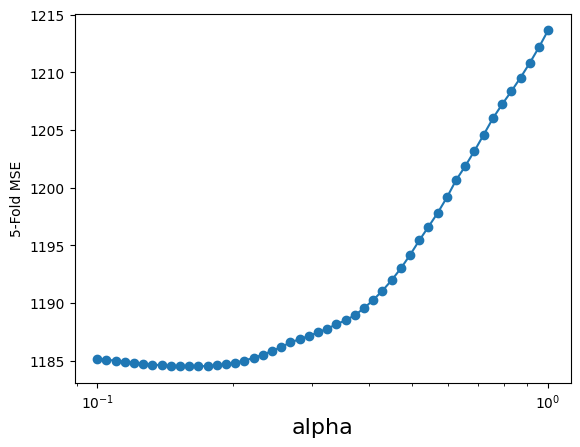

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,0,50)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train_s, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [55]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = grid.best_estimator_.predict(X_test_s)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 1184.42
R² Score: 0.62


In [56]:
lasso_coefficients = grid.best_estimator_.coef_
feature_names = data_house_no_price.columns

for feature, coef in zip(feature_names, lasso_coefficients):
    print(f"{feature}: {coef:.3f}")


host response time: -0.530
host total listings count: 9.614
latitude: -1.148
longitude: -0.000
accommodates: 11.402
bathrooms: 10.846
bedrooms: 9.065
beds: -2.368
cleaning fee: 22.225
guests included: 0.928
extra people: -0.403
minimum nights: -2.274
maximum nights: 0.000
availability 60: 4.912
availability 90: -2.511
number of reviews: -1.033
calculated host listings count: -8.363
property type_bed & breakfast: 0.000
property type_boat: -0.000
property type_boutique hotel: -0.000
property type_chalet: -0.318
property type_condominium: 0.000
property type_dorm: 0.000
property type_earth house: 0.000
property type_guest suite: 0.000
property type_guesthouse: -0.000
property type_house: 0.000
property type_loft: 0.827
property type_other: -0.461
property type_serviced apartment: 0.236
property type_tent: -0.000
property type_townhouse: 0.000
property type_villa: -0.291
room type_private room: -10.595
room type_shared room: -1.913
bed type_couch: -0.158
bed type_futon: -0.345
bed type_pul

*at first run* From here we can see that 'availability 30' and 'availabilty 365' has coefficients of 0, se we can take it out from the models, as it not useful

Why we dont take out other features? Because most of them are categorical variables that were encoded (anyways, considering that we have latitude and longitude, 
we can consider taking out countries, but we won't). Those columns will be added to columns_to_drop list in the cells above

Now, we'll evaluate the data with different models

Linear regression


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()

lin_reg.fit(X_train_s, y_train)

y_pred_lr = lin_reg.predict(X_test_s)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


y_train_pred_lr = lin_reg.predict(X_train_s)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

print("\nLinear Regression Coefficients:")
for feature, coef in zip(data_house.drop(columns=['price']).columns, lin_reg.coef_):
    print(f"{feature}: {coef:.3f}")



print(f"MSE (Linear Regression): {mse_lr:.3f}")
print(f"R² Score (Linear Regression): {r2_lr:.3f}")

print(f"R² Score (Train Set - Linear Regression): {r2_train_lr:.3f}")
print(f"R² Score (Test Set - Linear Regression): {r2_lr:.3f}")




Linear Regression Coefficients:
host response time: -0.769
host total listings count: 12.217
latitude: 5.707
longitude: -3.547
accommodates: 12.195
bathrooms: 11.140
bedrooms: 9.251
beds: -3.534
cleaning fee: 22.284
guests included: 1.268
extra people: -0.811
minimum nights: -2.444
maximum nights: 0.101
availability 60: 8.426
availability 90: -5.929
number of reviews: -0.985
calculated host listings count: -10.771
property type_bed & breakfast: 0.020
property type_boat: -0.094
property type_boutique hotel: -0.179
property type_chalet: -0.442
property type_condominium: 0.139
property type_dorm: 0.192
property type_earth house: 0.026
property type_guest suite: 0.073
property type_guesthouse: 0.079
property type_house: 0.151
property type_loft: 1.008
property type_other: -0.594
property type_serviced apartment: 0.385
property type_tent: -0.033
property type_townhouse: 0.064
property type_villa: -0.425
room type_private room: -10.619
room type_shared room: -1.944
bed type_couch: -0.758
be

Not that much difference in the R2 score, let's try polynomial regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
X_train_poly = pr.fit_transform(X_train_s)
X_test_poly = pr.transform(X_test_s)


lasso_poly = Lasso(alpha=grid.best_params_['alpha'])
lasso_poly.fit(X_train_poly, y_train)

y_pred_poly = lasso_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

y_train_pred_poly = lasso_poly.predict(X_train_poly)
r2_train_poly = r2_score(y_train, y_train_pred_poly)

print(f"MSE (Polynomial Regression with Lasso): {mse_poly:.3f}")
print(f"R² Score (Train Set - Polynomial Regression with Lasso): {r2_train_poly:.3f}")
print(f"R² Score (Test Set - Polynomial Regression with Lasso): {r2_poly:.3f}")

MSE (Polynomial Regression with Lasso): 1035.579
R² Score (Train Set - Polynomial Regression with Lasso): 0.762
R² Score (Test Set - Polynomial Regression with Lasso): 0.665


Now lets try with Random Forest Regressor

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ........................................max_depth=8; total time=   0.4s
[CV] END ........................................max_depth=8; total time=   0.4s
[CV] END ........................................max_depth=8; total time=   0.4s
[CV] END ........................................max_depth=8; total time=   0.4s
[CV] END ........................................max_depth=8; total time=   0.4s
[CV] END ........................................max_depth=9; total time=   0.5s
[CV] END ........................................max_depth=9; total time=   0.5s
[CV] END ........................................max_depth=9; total time=   0.5s
[CV] END ........................................max_depth=9; total time=   0.5s
[CV] END ........................................max_depth=9; total time=   0.5s
[CV] END .......................................max_depth=10; total time=   0.6s
[CV] END .......................................

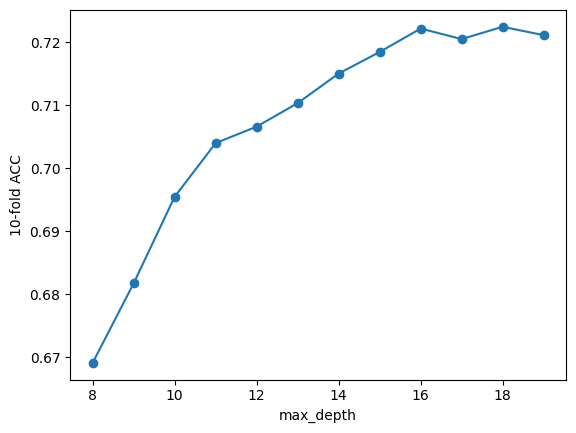

In [59]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(8,20)

tuned_parameters = {'max_depth':maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, max_features = 'sqrt', n_estimators=200), param_grid=tuned_parameters, cv=5, verbose=2)
grid.fit(X_train_s,y_train)

print(f"Best Mean Cross Validation score: {grid.best_score_}")
print(f"Best Parameters: {grid.best_params_}")

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')
plt.show()


In [60]:

randomForest = RandomForestRegressor(max_depth=grid.best_params_['max_depth'],max_features='sqrt').fit(X_train_s,y_train)

print("Train: ",randomForest.score(X_train_s,y_train))
print("Test: ",randomForest.score(X_test_s,y_test))

Train:  0.9390336664260256
Test:  0.7020581575045799


Well, the model is overfitted, I need to take out some variables and re run the model for that, we will use RFE (recursive feature elimination)

In [61]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor


rf_regressor = RandomForestRegressor(random_state=0)


selector = RFE(estimator=rf_regressor, n_features_to_select=25)  
selector = selector.fit(X_train_s, y_train)

selected_features = [feature for feature, selected in zip(data_house.columns[:-1], selector.support_) if selected]

print(f"Selected features: {selected_features}")



Selected features: ['host response time', 'host total listings count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning fee', 'guests included', 'extra people', 'minimum nights', 'maximum nights', 'availability 60', 'availability 90', 'number of reviews', 'property type_guesthouse', 'property type_villa', 'room type_private room', 'cancellation policy_flexible_new', 'cancellation policy_moderate_new', 'cancellation policy_strict', 'country_cuba', 'country_netherlands']


In [62]:

r2_selected = r2_score(y_test, y_pred)
print(f"R² (Selected Features): {r2_selected:.3f}")

mse_selected = mean_squared_error(y_test, y_pred)
print(f"MSE (Selected Features): {mse_selected:.3f}")


rmse_selected = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE (Selected Features): {rmse_selected:.3f}")

R² (Selected Features): 0.617
MSE (Selected Features): 1184.419
RMSE (Selected Features): 34.415


C:\Users\flpga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [64]:
#we create a new X_test only having the selected features on random forest selection

X_train_s_selected = X_train_s[:, selector.support_]
X_test_s_selected = X_test_s[:, selector.support_]

#train with reduced features
rf_regressor.fit(X_train_s_selected, y_train)


#and now we predict

y_train_pred = rf_regressor.predict(X_train_s_selected)
y_test_pred = rf_regressor.predict(X_test_s_selected)

#evaluate

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Performance on Selected Features:")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Train R²: {train_r2:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test R²: {test_r2:.3f}")

Performance on Selected Features:
Train RMSE: 11.280
Train R²: 0.962
Test RMSE: 29.428
Test R²: 0.720


Just checking dimensions

In [65]:
print(f"Shape of X_train_s_selected: {X_train_s_selected.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test_s_selected: {X_test_s_selected.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train_s_selected: (6518, 25)
Shape of y_train: (6518,)
Shape of X_test_s_selected: (2115, 25)
Shape of y_test: (2115,)


So, for a clearer view, I'll plot the model with the actual price values.
Blue is for predicted values, Red is for actual values. (It is prefect diagonal line as for that scatter both axes have exactly the same data)

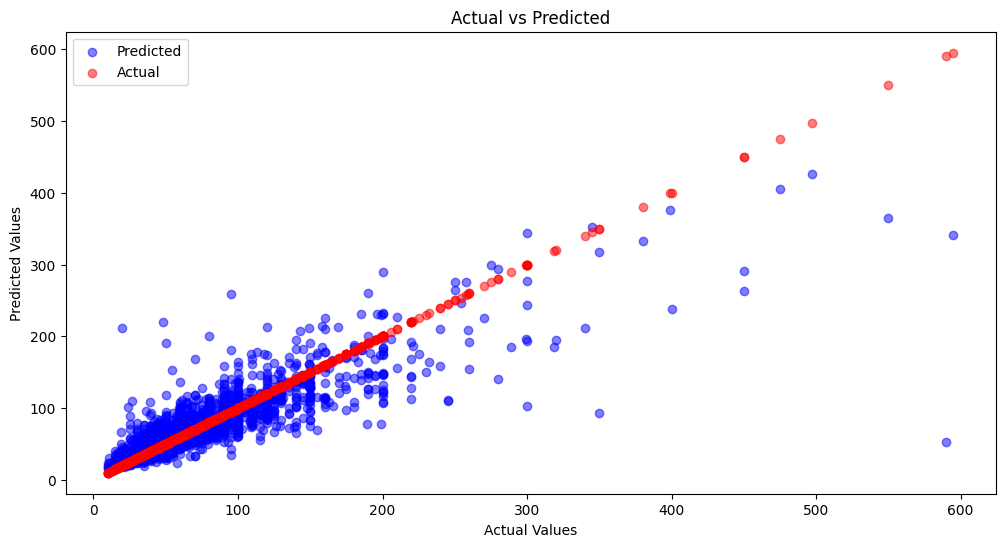

In [66]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label="Predicted")
plt.scatter(y_test, y_test, alpha=0.5, color='red', label="Actual")
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend(loc='upper left')
plt.show()

In [67]:

print("Train: ",rf_regressor.score(X_train_s_selected,y_train))
print("Test: ",rf_regressor.score(X_test_s_selected,y_test))

Train:  0.9615117694010555
Test:  0.7198078468148125


Let's try with KNN

In [68]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],  
    'weights': ['uniform', 'distance'],    
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
}

knn = KNeighborsRegressor()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1)

grid.fit(X_train_s,y_train)

best_params = grid.best_params_
print(f"Best parameters: {best_params}")

best_knn = grid.best_estimator_
print(f"Best estimator: {best_knn}")

Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
Best estimator: KNeighborsRegressor(n_neighbors=10, weights='distance')


In [69]:
y_train_pred = best_knn.predict(X_train_s)
y_test_pred = best_knn.predict(X_test_s)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)


test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)


print("\nTraining set performance:")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Train R²: {train_r2:.3f}")

print("\nTest set performance:")
print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test R²: {test_r2:.3f}")


Training set performance:
Train RMSE: 0.002
Train R²: 1.000

Test set performance:
Test RMSE: 34.061
Test R²: 0.625


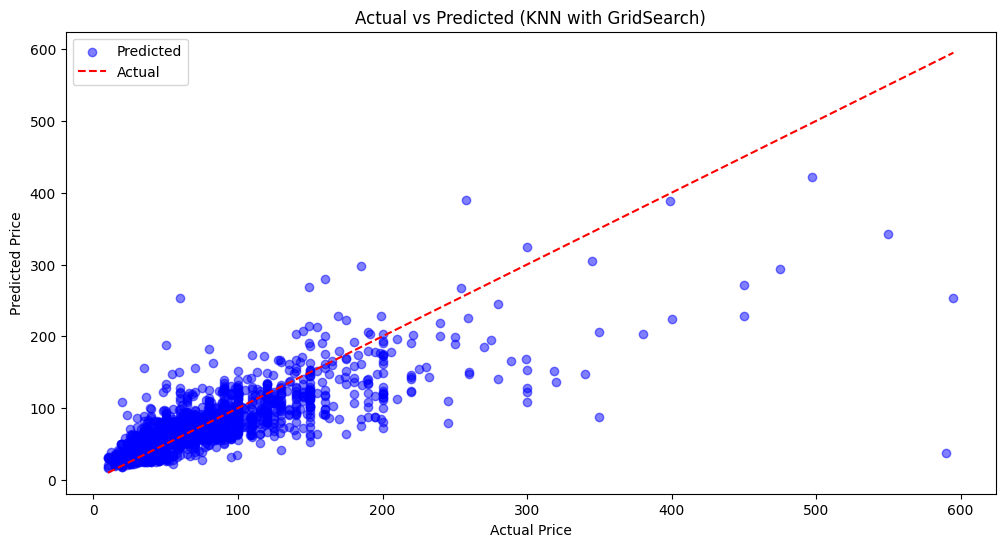

In [70]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Actual")
plt.title("Actual vs Predicted (KNN with GridSearch)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()

In [71]:
print("Train R²: ", best_knn.score(X_train_s, y_train))
print("Test R²: ", best_knn.score(X_test_s, y_test))

Train R²:  0.9999999983270792
Test R²:  0.6246450153018247


Now we'll try the same but with the feature selection done



In [72]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],  
    'weights': ['uniform', 'distance'],    
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  
}

knn = KNeighborsRegressor()

grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1)

grid.fit(X_train_s_selected,y_train)

best_params = grid.best_params_
print(f"Best parameters: {best_params}")

best_knn = grid.best_estimator_
print(f"Best estimator: {best_knn}")

Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 10, 'weights': 'distance'}
Best estimator: KNeighborsRegressor(algorithm='ball_tree', n_neighbors=10, weights='distance')


In [73]:
y_train_pred = best_knn.predict(X_train_s_selected)
y_test_pred = best_knn.predict(X_test_s_selected)

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)


test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)


print("\nTraining set performance:")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Train R²: {train_r2:.3f}")

print("\nTest set performance:")
print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test R²: {test_r2:.3f}")


Training set performance:
Train RMSE: 0.000
Train R²: 1.000

Test set performance:
Test RMSE: 32.593
Test R²: 0.656


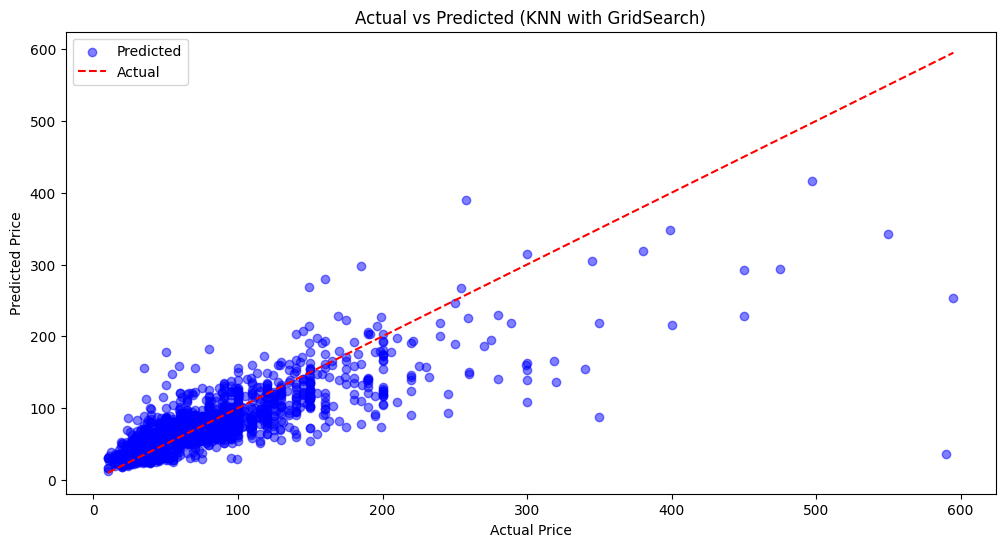

In [74]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label="Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Actual")
plt.title("Actual vs Predicted (KNN with GridSearch)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()

In [75]:
print("Train R²: ", best_knn.score(X_train_s_selected, y_train))
print("Test R²: ", best_knn.score(X_test_s_selected, y_test))

Train R²:  1.0
Test R²:  0.6563046303619902


Summary

(FF: full features, SF:selected features)

| Model Used            | Train Accuracy | Test Accuracy |
|-----------------------|----------------|---------------|
| Random Forest (SF)    |     96.2 %      |     72 %     |
| Random Forest (FF)    |     93.8 %      |    70.1 %    |
| KNN (SF)              |      100 %      |    65.6 %    |
| KNN (FF)              |      100 %      |    62.4 %    |
| Linear Regression     |     65.5 %      |     61 %     |
| Polynomial Regression |     76.2 %      |    66.5 %    |

After all, we managed to have a models with accuracies between 60-72%.
 - Linear regression Model is the the weakest as expected, because it just tries to adapt a straight line into the model. Anyways, linear regression should be always the first to try in regression problems.
 - Polynomial regression has an unexpected 66.5% of acuraccy, unexpected because is like the next step from linear regression
 - KNN's: The KNN with full features was expected to have a not-so-good performance mainly because I was putting the whole DF into it. We managed to increase 3.2% the model after selecting features or reducing dimensionality
 - Random Forest Regresors: Those were the strongest ones, also same case as KNN's, full feature model has less acuraccy than the one with the selected features, although is not that big difference, is well received, as it is the strongest model in this case, with a 72% acuraccy in the tests.

## Final conclusions

After working with a real dataset, the big dimensionality may have affect the performance of the models used. The data was scaled to have better performance on the model. Anyways, in order to improve the performance, we need to be more strict with the variables/features to select, and maybe more data. The model will be able to generalize more as its fed with more data. The value of alpha (that low) indicates that the model needed small regularization as the coefficients where not that big (outliers where taken out exactly for this reason).

I'll never have a perfect model, anyways, here is my attempt for this one.

Felipe Gallegos